In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [42]:
## Helper functions
def std_deviation(x_arr) -> float:
    mean = np.mean(x_arr)
    std_dev = 0
    for val in x_arr:
        std_dev += np.power(val - mean, 2)
    return np.sqrt(1.0/(len(x_arr) - 1) * std_dev)

def std_error(x_arr) -> float:
    return std_deviation(x_arr) / np.sqrt(len(x_arr))

In [43]:
DATA_PATH = "../Data/Exercise_5/"

# Avg. over multiple seeds
n_keys = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
fast_4_independent, slow_4_independent, multiply_shift = [], [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    fast_4_independent.append(data[:,1].astype(float).tolist())
    slow_4_independent.append(data[:,2].astype(float).tolist())
    multiply_shift.append(data[:,3].astype(float).tolist())

fast_4_independent_avgs = np.mean(np.array(fast_4_independent),axis=0)
slow_4_independent_avgs = np.mean(np.array(slow_4_independent),axis=0)
multiply_shift_avgs     = np.mean(np.array(multiply_shift)    ,axis=0)

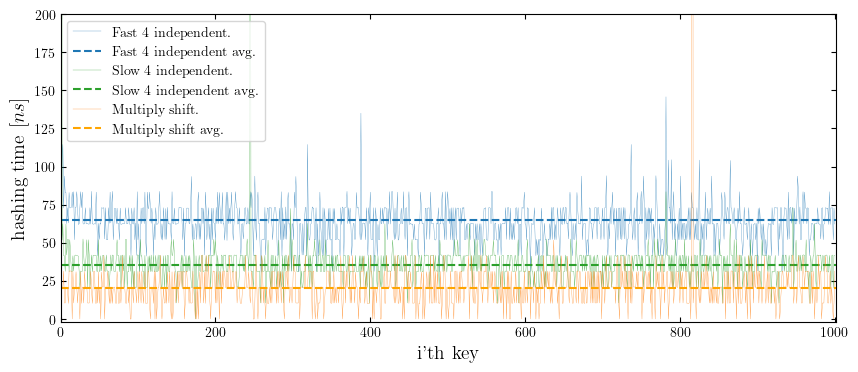

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

first_x_vals = 1000


ax.plot(n_keys[:first_x_vals], fast_4_independent_avgs[:first_x_vals],color='tab:blue', lw=0.2, label='Fast 4 independent.')
ax.hlines(np.mean(fast_4_independent_avgs),0,n_keys[first_x_vals],ls='--',color='tab:blue', label='Fast 4 independent avg.')

ax.plot(n_keys[:first_x_vals], slow_4_independent_avgs[:first_x_vals],color='tab:green', lw=0.2, label='Slow 4 independent.')
ax.hlines(np.mean(slow_4_independent_avgs),0,n_keys[first_x_vals],ls='--',color='tab:green', label='Slow 4 independent avg.')

ax.plot(n_keys[:first_x_vals], multiply_shift_avgs[:first_x_vals], lw=0.2, color='tab:orange',label='Multiply shift.')
ax.hlines(np.mean(multiply_shift_avgs),0,n_keys[first_x_vals],ls='--',color='orange', label='Multiply shift avg.')


ax.set_xlabel("i'th key", size=14)
ax.set_ylabel(r"hashing time $[ns]$", size=14)
ax.set_ylim(-2,200)
ax.set_xlim(0,n_keys[first_x_vals])

ax.legend()
plt.savefig("exercise_5.pdf")
plt.show()

In [45]:
DATA_PATH = "../Data/Exercise_7/"

# Avg. over multiple seeds
n_keys = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
average_HWC_update_times, average_sketch_update_times_1 = [], []
average_sketch_update_times_2, average_sketch_update_times_3 = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    average_HWC_update_times.append(data[:,1].astype(float).tolist())
    average_sketch_update_times_1.append(data[:,2].astype(float).tolist())
    average_sketch_update_times_2.append(data[:,3].astype(float).tolist())
    average_sketch_update_times_3.append(data[:,4].astype(float).tolist())

average_HWC_update_times_avgs = np.mean(np.array(average_HWC_update_times), axis=0)
average_sketch_update_times_1_avgs = np.mean(np.array(average_sketch_update_times_1), axis=0)
average_sketch_update_times_2_avgs = np.mean(np.array(average_sketch_update_times_2), axis=0)
average_sketch_update_times_3_avgs = np.mean(np.array(average_sketch_update_times_3), axis=0)

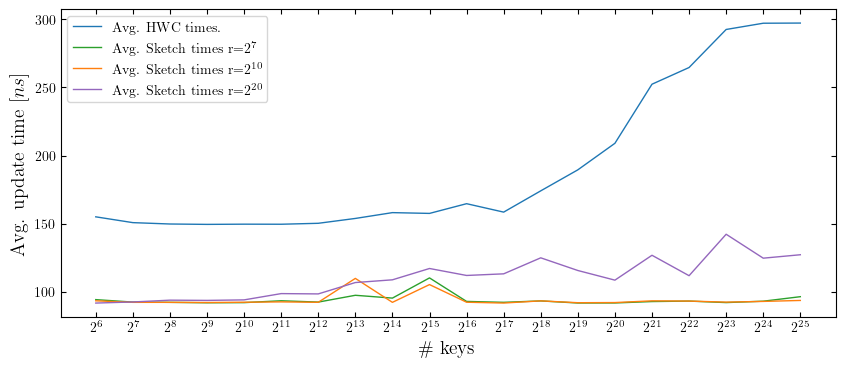

In [46]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(n_keys, average_HWC_update_times_avgs,color='tab:blue', lw=1, label='Avg. HWC times.')
ax.plot(n_keys, average_sketch_update_times_1_avgs,color='tab:green', lw=1, label=r'Avg. Sketch times r=$2^7$')
ax.plot(n_keys, average_sketch_update_times_2_avgs,color='tab:orange', lw=1, label=r'Avg. Sketch times r=$2^{10}$')
ax.plot(n_keys, average_sketch_update_times_3_avgs,color='tab:purple', lw=1, label=r'Avg. Sketch times r=$2^{20}$')

ax.set_xlabel("\# keys", size=14)
ax.set_ylabel(r"Avg. update time $[ns]$", size=14)
ax.set_xscale('log',base=2)
ax.set_xticks(n_keys)
ax.set_xticklabels(['$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$',
                    '$2^{20}$','$2^{21}$','$2^{22}$',
                    '$2^{23}$','$2^{24}$','$2^{25}$'])

ax.legend()
plt.savefig("exercise_7.pdf")
plt.show()

In [47]:
DATA_PATH = "../Data/Exercise_8/"

# Avg. over multiple seeds
r_values = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

avg_relative_errs_avgs = np.mean(np.array(avg_relative_errs), axis=0)
max_relative_errs_avgs = np.mean(np.array(max_relative_errs), axis=0)

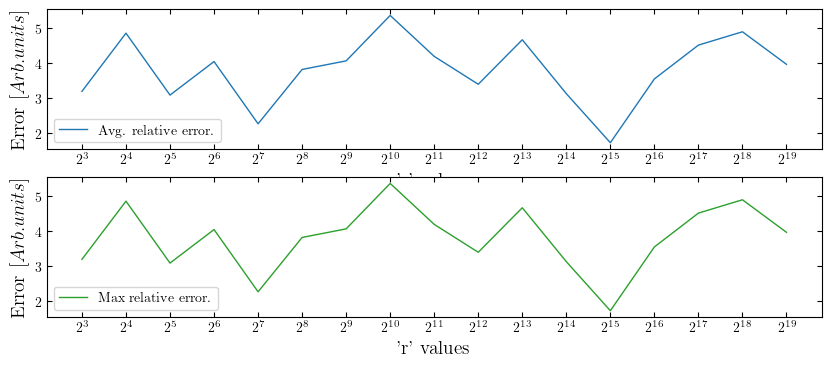

In [48]:
fig, ax = plt.subplots(2,1,figsize=(10,4))

ax[0].plot(r_values, avg_relative_errs_avgs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[0].legend()

ax[1].plot(r_values, max_relative_errs_avgs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[1].legend()

plt.savefig("exercise_8.pdf")
plt.show()

In [49]:
DATA_PATH = "../Data/Exercise_9/"

# Avg. over multiple seeds
r_values = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

avg_relative_errs_avgs = np.mean(np.array(avg_relative_errs), axis=0)
max_relative_errs_avgs = np.mean(np.array(max_relative_errs), axis=0)

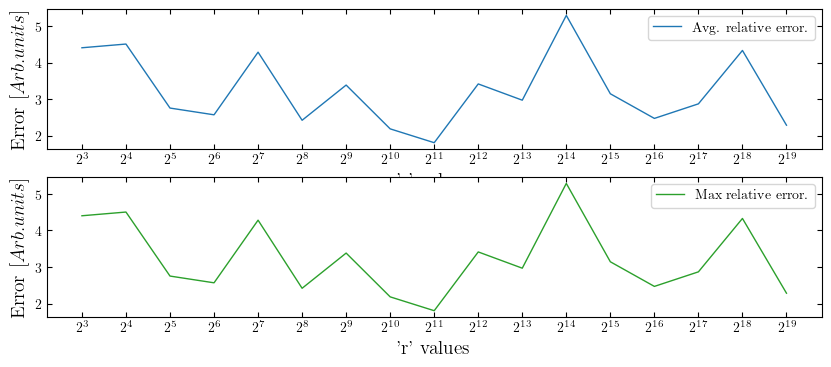

In [52]:
fig, ax = plt.subplots(2,1,figsize=(10,4))

ax[0].plot(r_values, avg_relative_errs_avgs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[0].legend()

ax[1].plot(r_values, max_relative_errs_avgs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[1].legend()

plt.savefig("exercise_9.pdf")
plt.show()